In [2]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
from os.path import expandvars
import scipy.constants as spc
import scipy as sc
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from scipy.optimize import minimize
from scipy.stats.distributions import chi2
import scipy

In [3]:
'''

Functions used

'''

def gaussian(x, pos, wid, amp):
    y = amp*np.exp(-4*np.log(2)*((x-pos)/(wid))**2)
    return y

def biGauss(x, pos, wid, r, amp):
    mask = x < pos

    y_all = ([])
    for i in range(0, len(mask)):

        if mask[i] == True:
            m = 1
            nm = 0
        else:
            m = 0
            nm = 1
        if r != 0:
            y1 = gaussian(x[i],pos,r*wid/(r+1),amp)*m
            y2 = gaussian(x[i],pos,wid/(r+1),amp)*nm
            y = y1 + y2
        else:
            y = gaussian(x[i],pos,wid, amp)*nm

        y_all = np.append(y_all, y)
    return y_all

def double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2):
    b1 = biGauss(x, pos1, wid1, r1, amp1)
    b2 = biGauss(x, pos2, wid2, r2, amp2)
    b = np.append(b1, b2)
    return b1+b2

def log_likelihood_biGauss(theta, n, x):
    pos, wid, r, amp = theta
    model = biGauss(x, pos, wid, r, amp)
    L = model - (n*np.log(model))
    #print('*****************One Peak***************')
    #print(theta, np.sum(L))
    return np.sum(L)

def log_likelihood_doublePeak(theta, n, x):
    pos1, wid1, r1, amp1, pos2, wid2, r2, amp2 = theta
    model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
    L = model - (n*np.log(model))
    #print('*****************Double Peak***************')
    #print(theta, np.sum(L))
    return np.sum(L)

def likelihood_ratio_doublePeak(x, n, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2):
    model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
    val = model - n + (n*np.log(n/model))
    #print('log - ', n/model, 'n - ', n)
    return np.sum(val)

def likelihood_ratio_biGauss(x, n, pos, wid, r, amp):
    model = biGauss(x, pos, wid, r, amp)
    val = model - n + (n*np.log(n/model))
    #print('log - ', n/model, 'n - ', n)
    return np.sum(val)

In [4]:
'''

Loading the geometry

'''

gcd_file = dataio.I3File('/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz')
cframe = gcd_file.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo
print('loaded geometry')

loaded geometry


('FILE NUMBER - ', 713)
('frame num - ', 1)
('frame num - ', 2)
('frame num - ', 3)
('frame num - ', 4)
('frame num - ', 5)
LOG LIKELIHOOD
----------BOUNDS-----------
((-5.584704779088497, 8.415295220911503), (0, 100), (0, 10), (0, 1000000.0))


/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method Powell cannot handle constraints nor bounds.
  RuntimeWarning)


*****----------timeDifference > 100----------********
-196.2771504286682
(   direc: array([[  0.        ,   0.        ,   0.        ,   1.        ],
       [  0.        ,   1.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   1.        ,   0.        ],
       [  0.30258447,  -0.18004094,  -0.02568126, -16.66988502]])
     fun: -26691.486527177472
 message: 'Optimization terminated successfully.'
    nfev: 132
     nit: 3
  status: 0
 success: True
       x: array([-2.35773623e-01,  4.91115152e+01,  4.76409076e+00,  5.16576288e+02]),    direc: array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in log
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in log


Reached Here
P-VAL CALCULATED
('frame num - ', 6)
('frame num - ', 7)
('frame num - ', 8)
('frame num - ', 9)
('frame num - ', 10)
LOG LIKELIHOOD
----------BOUNDS-----------
((-4.803289198767743, 7.196710801232257), (0, 100), (0, 10), (0, 1000000.0))
Reached Here
P-VAL CALCULATED
('frame num - ', 11)
('frame num - ', 12)
('frame num - ', 13)
('frame num - ', 14)
('frame num - ', 15)
('frame num - ', 16)


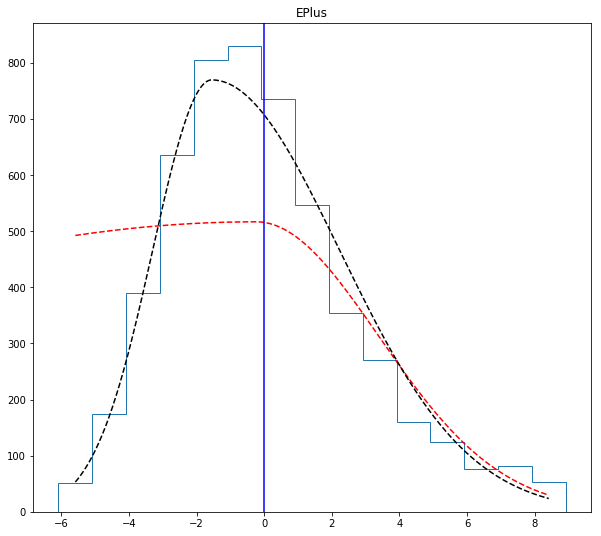

In [5]:
tau_timeDiff = ([])
tau_pVal = ([])
tau_LRR = ([])
tau_wid1_ratio = ([])
tau_wid2_ratio = ([])
tau_amp1_ratio = ([])
tau_amp2_ratio = ([])

e_timeDiff = ([])
e_pVal = ([])
e_LRR = ([])
e_wid1_ratio = ([])
e_wid2_ratio = ([])
e_amp1_ratio = ([])
e_amp2_ratio = ([])

tau_wid_ratio_dp = ([])
e_wid_ratio_dp = ([])
tau_amp_ratio_dp = ([])
e_amp_ratio_dp = ([])

#break_all = True
 
for i in range(713,714):
    print('FILE NUMBER - ', i)
    file = dataio.I3File('/data/p-one/akatil/step_4_medium_water/NuTau_NuE_20Events/step_4_'+str(i)+'_medium_water_custom_mDOM_noise.i3.gz')
    #file = dataio.I3File(str(args.infile))
    
    txt_file = open("copy.txt", "a") 

    f = 1
    for frame in file:
        print('frame num - ', f)
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)

        '''
        Removing NC interations of the neutrino
        '''

        #if lepton.type == 12 or lepton.type == -12 or lepton.type == 16 or lepton.type == -16:
            #continue

        '''
        Lepton position
        '''
        #lepton_pos = lepton.pos
        #x_lepton_pos = lepton_pos.x
        #y_lepton_pos = lepton_pos.y
        #z_lepton_pos = lepton_pos.z

        mcpeMap = frame['MCPESeriesMap']
        noiseMap = frame['NoiseSeriesMap']

        #print('Finding OM Positions and time residuals')


        #looping through doms that have physics hits
        for omkey in mcpeMap.keys():
            oKey = omgeo.get(omkey)

            '''
            Dom Positons
            '''
            #domPos = oKey.position
            #x_dom = domPos.x
            #y_dom = domPos.y
            #z_dom = domPos.z

            '''
            Distance between event vertex and DOM
            '''
            #distance = np.sqrt((x_dom - x_lepton_pos)**2 + (y_dom - y_lepton_pos)**2 +
                               #(z_dom - z_lepton_pos)**2)

            #removing doms with distances > 100m from the event vertex
            #if distance > 200:
                #continue

            '''
            Obtaining the timeList
            '''
            noise_mcpeList = noiseMap[omkey]
            noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
            mcpeList = mcpeMap[omkey]
            timeList = np.array([mcpe.time for mcpe in mcpeList])
            tot_timeList = np.append(timeList, noise_timeList)


            '''
            Removing DOMs with hits less than 250 Hits
            '''
            if len(tot_timeList) < 250:
                continue


            '''
            Calculating the mean and removing the tails
            '''

            timeList = timeList[timeList < min(timeList)+30]

            mean_physicsHits = timeList.mean()
            mean_tot = tot_timeList.mean()

            select_time = tot_timeList[(tot_timeList > mean_physicsHits-50) & (tot_timeList < mean_physicsHits+50)]
            new_mean = select_time.mean()

            bins = np.arange(min(select_time), max(select_time), 1)
            max_hitTimes = select_time[(select_time > (new_mean-40))&(select_time < (new_mean+40))]

            z = stats.zscore(max_hitTimes)
            #using zscore to remove the effect of outliers from the analysis]
            max_hitTimes = max_hitTimes[(z>-1.2)&(z < 1.2)]
            new_mean = max_hitTimes.mean()
            timestamps = max_hitTimes - new_mean
            final_mean = timestamps.mean()

            num_photons = len(max_hitTimes[max_hitTimes>0])

            if len(max_hitTimes) < 250:
                continue

            #if len(max_hitTimes) < 10:
                #continue

            #if np.log10(num_photons) >= 3.0 or np.log10(num_photons) < 2.5:
                #continue

            '''
            Histogramming the data from simulation
            '''

            bins = np.arange(min(timestamps), max(timestamps), 1)
            num, bin_edges = np.histogram(timestamps, bins=bins)
            bin_centers = (bin_edges[:-1]+bin_edges[1:])/2

            '''
            Removing hits for DOMs that have more than 200 hits in 1 second bin.
            '''
            if max(num) > 175 or len(num) == 0:

                print('LOG LIKELIHOOD')

                '''
                Removing DOMs that don't have less than 8 non zero bins
                '''
                if len(num[num>0]) <= 8:
                    print('Removing DOMs that dont have less than 8 non zero bins')
                


                '''
                Fitting bifurcated Gaussian and double bifurcated gaussian to the mcpe hit time distributions
                for both tau and electron.
                '''

                nll = lambda *args: log_likelihood_biGauss(*args)
                initial_biGauss = np.array([final_mean, 50, 5, max(num)])
                #bnds_biGauss = ((min(bin_centers), mean_timeArrival), (0, 20), (0, 2), (0, max(num)), (mean_timeArrival, max(bin_centers)), (0, 20), (0, 2), (0, max(num)))

                #print(len(num), len(initial_biGauss), initial_biGauss)
                bnds_biGauss = ((min(bin_centers), max(bin_centers)), (0, 100), (0, 10), (0, 1e6))
                print('----------BOUNDS-----------')
                print(bnds_biGauss)
                soln_biGauss = minimize(log_likelihood_biGauss, initial_biGauss, args=(num, bin_centers),
                                    method='Powell', bounds = bnds_biGauss)

                nll = lambda *args: log_likelihood_doublePeak(*args)
                initial_doublePeak = np.array([min(bin_centers)+10, 20, 1, max(num), final_mean, 20, 1, max(num)])
                bnds_doublePeak = ((min(bin_centers), final_mean), (0, 100), (0, 10), (0, 1e6),
                               (final_mean, max(bin_centers)), (0, 100), (0, 10), (0,1e6))
                soln_doublePeak = minimize(log_likelihood_doublePeak, initial_doublePeak, args=(num, bin_centers),
                                       method='Powell',bounds=bnds_doublePeak)
                
                

                '''
                Removing DOMs whose minimization is not successful
                '''
                #if soln_biGauss.success == False or soln_doublePeak.success == False:
                #print('Removing DOMs whose minimization is not successful')
                #continue

                '''
                Calculating the Likelihood ratio for bifurcated gaussian and double double bifurcated gaussian
                '''
                LR_biGauss = likelihood_ratio_biGauss(bin_centers[num>0], num[num>0], soln_biGauss.x[0],
                                             soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
                LR_doublePeak = likelihood_ratio_doublePeak(bin_centers[num>0], num[num>0], soln_doublePeak.x[0], soln_doublePeak.x[1],
                                             soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                             soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])


                '''
                Calculating the p-value using the likelihood ratio
                '''
                pVal_biGauss = chi2.sf(LR_biGauss, len(num) - 4)
                pVal_doublePeak = chi2.sf(LR_doublePeak, len(num) - 8)

                if pVal_biGauss != pVal_biGauss:
                    print('BiGauss is not well defined - ', str(lepton.type))
                    print('Minimisation - ', soln_biGauss.success)
                    print('Degrees of Freedom - ', len(num) - 4)
                    print('Log Likelihood - ', LR_biGauss)
                if pVal_doublePeak != pVal_doublePeak:
                    print('double peak is not well defined - ', str(lepton.type))
                    print('Minimisation - ', soln_doublePeak.success)
                    print('Degrees of Freedom - ', len(num) - 8)
                    print('Log Likelihood - ', LR_doublePeak)


                '''
                (x, y) values for the fit
                '''
                x = np.linspace(min(bin_centers), max(bin_centers), 1000)
                #x = np.linspace(0, max(bin_centers)+1e5, 1000)
                y_biGauss = biGauss(x, soln_biGauss.x[0],
                                             soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
                y_doublePeak = double_peak(x, soln_doublePeak.x[0], soln_doublePeak.x[1],
                                             soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                             soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])

                '''
                Calculating the time difference and p-value ratio of bigauss and double peak
                '''
                timeDifference_doublePeak = soln_doublePeak.x[4] - soln_doublePeak.x[0]
                pVal_ratio = pVal_doublePeak/pVal_biGauss
                LRR = LR_doublePeak/LR_biGauss
                wid1_ratio = soln_doublePeak.x[1]/soln_biGauss.x[1]
                wid2_ratio = soln_doublePeak.x[5]/soln_biGauss.x[1]
                amp1_ratio = soln_doublePeak.x[3]/soln_biGauss.x[3]
                amp2_ratio = soln_doublePeak.x[7]/soln_biGauss.x[3]
                wid1_wid2 = soln_doublePeak.x[1]/soln_doublePeak.x[5]
                amp1_amp2 = soln_doublePeak.x[3]/soln_doublePeak.x[7]



                '''
                Removing terrible fits
                '''
                if abs(timeDifference_doublePeak) > 100:
                    print('*****----------timeDifference > 100----------********')
                    print(timeDifference_doublePeak)
                    #txt_file_array = np.array([i])
                    txt_file.write("Text ----" + str(i) +'----'+ str(timeDifference_doublePeak) + '----\n')
                    print(soln_biGauss, soln_doublePeak)
                    
                    '''
                    plot mcpe time distributions obtained using simulations and the fits
                    '''
                    plt.figure(figsize=(10,9))
                    _ = plt.hist(timestamps, bins=bins, histtype='step')
                    plt.title(str(lepton.type))
                    plt.plot(x, y_biGauss, '--', c = 'r')
                    plt.plot(x, y_doublePeak, '--', c = 'k')
                    plt.axvline(final_mean, c = 'b')
                        #continue

                amp1 = soln_doublePeak.x[3]
                amp2 = soln_doublePeak.x[7]
                if amp1/amp2 < 1/4 and amp1/amp2 > 4:
                    print('Removing terrible fits')
                    #continue

                if amp1 < 0 or amp2 < 0:
                    print('Error in amp')
                    continue
                
                print('Reached Here')


                


                '''
                Separating the time difference calculated above and appending the values
                '''

                '''
                Tau
                '''
                if lepton.type == 15 or lepton.type == -15:
                    tau_timeDiff = np.append(tau_timeDiff, timeDifference_doublePeak)
                    tau_pVal = np.append(tau_pVal, pVal_ratio)
                    tau_LRR = np.append(tau_LRR, LRR)
                    tau_wid1_ratio = np.append(tau_wid1_ratio, wid1_ratio)
                    tau_wid2_ratio = np.append(tau_wid2_ratio, wid2_ratio)
                    tau_amp1_ratio = np.append(tau_amp1_ratio, amp1_ratio)
                    tau_amp2_ratio = np.append(tau_amp2_ratio, amp2_ratio)

                    tau_wid_ratio_dp = np.append(tau_wid_ratio_dp, wid1_wid2)
                    tau_amp_ratio_dp = np.append(tau_amp_ratio_dp, amp1_amp2)
                    #plt.title('E')

                '''
                Electron and Neutral Current
                '''

                if lepton.type == 11 or lepton.type == -11 or lepton.type == 12 or lepton.type == -12 or lepton.type == 16 or lepton.type == -16:
                    
                    e_timeDiff = np.append(e_timeDiff, timeDifference_doublePeak)
                    e_pVal = np.append(e_pVal, pVal_ratio)
                    e_LRR = np.append(e_LRR, LRR)
                    e_wid1_ratio = np.append(e_wid1_ratio, wid1_ratio)
                    e_wid2_ratio = np.append(e_wid2_ratio, wid2_ratio)
                    e_amp1_ratio = np.append(e_amp1_ratio, amp1_ratio)
                    e_amp2_ratio = np.append(e_amp2_ratio, amp2_ratio)

                    e_wid_ratio_dp = np.append(e_wid_ratio_dp, wid1_wid2)
                    e_amp_ratio_dp = np.append(e_amp_ratio_dp, amp1_amp2)
                print('P-VAL CALCULATED')
                
                
    
                    
                #break_all = True
                
                #break
                
        #if break_all:
            #break
    #if break_all:
        #break



                    #plt.title('Tau')


                


        '''
        print(tot_timeList)

        bins = np.arange(min(tot_timeList), min(tot_timeList)+41, 1)
        num, bin_edges, _ = plt.hist(tot_timeList, bins=bins, histtype='step')
        plt.title('Tau')
        '''
        f = f+1
    txt_file.close() 

array([-0.6757868 , -0.16793777, -0.2208166 , ...,  1.17879837,
        1.4322503 ,  1.06515872])

In [20]:
 #photons
numHits = ([])

for i in range(0, 2000):
    print('FILE NUMBER - ', i)
    file = dataio.I3File('/data/p-one/akatil/step_4_medium_water/NuTau_NuE_20Events/step_4_'+str(i)+'_medium_water_custom_mDOM_noise.i3.gz')

    for frame in file:
        numHitsinDOM = ([])
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)
        
        mcpeMap = frame['MCPESeriesMap']
        noiseMap = frame['NoiseSeriesMap']

        #looping through doms that have physics hits
        for omkey in mcpeMap.keys():
            oKey = omgeo.get(omkey)

            '''
            Obtaining the timeList
            '''
            noise_mcpeList = noiseMap[omkey]
            noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
            mcpeList = mcpeMap[omkey]
            timeList = np.array([mcpe.time for mcpe in mcpeList])
            tot_timeList = np.append(timeList, noise_timeList)
            numHitsinDOM = np.append(tot_timeList, noise_timeList)
            
            #print(numHitsinDOM)
            
        numHits = np.append(numHits, sum(numHitsinDOM))
        #print('TOTAL', numHits)

('FILE NUMBER - ', 0)
('FILE NUMBER - ', 1)
('FILE NUMBER - ', 2)
('FILE NUMBER - ', 3)
('FILE NUMBER - ', 4)
('FILE NUMBER - ', 5)
('FILE NUMBER - ', 6)
('FILE NUMBER - ', 7)
('FILE NUMBER - ', 8)
('FILE NUMBER - ', 9)
('FILE NUMBER - ', 10)
('FILE NUMBER - ', 11)
('FILE NUMBER - ', 12)
('FILE NUMBER - ', 13)
('FILE NUMBER - ', 14)
('FILE NUMBER - ', 15)
('FILE NUMBER - ', 16)
('FILE NUMBER - ', 17)
('FILE NUMBER - ', 18)
('FILE NUMBER - ', 19)
('FILE NUMBER - ', 20)
('FILE NUMBER - ', 21)
('FILE NUMBER - ', 22)
('FILE NUMBER - ', 23)
('FILE NUMBER - ', 24)
('FILE NUMBER - ', 25)
('FILE NUMBER - ', 26)
('FILE NUMBER - ', 27)
('FILE NUMBER - ', 28)
('FILE NUMBER - ', 29)
('FILE NUMBER - ', 30)
('FILE NUMBER - ', 31)
('FILE NUMBER - ', 32)
('FILE NUMBER - ', 33)
('FILE NUMBER - ', 34)
('FILE NUMBER - ', 35)
('FILE NUMBER - ', 36)
('FILE NUMBER - ', 37)
('FILE NUMBER - ', 38)
('FILE NUMBER - ', 39)
('FILE NUMBER - ', 40)
('FILE NUMBER - ', 41)
('FILE NUMBER - ', 42)
('FILE NUMBER - ', 43

('FILE NUMBER - ', 349)
('FILE NUMBER - ', 350)
('FILE NUMBER - ', 351)
('FILE NUMBER - ', 352)
('FILE NUMBER - ', 353)
('FILE NUMBER - ', 354)
('FILE NUMBER - ', 355)
('FILE NUMBER - ', 356)
('FILE NUMBER - ', 357)
('FILE NUMBER - ', 358)
('FILE NUMBER - ', 359)
('FILE NUMBER - ', 360)
('FILE NUMBER - ', 361)
('FILE NUMBER - ', 362)
('FILE NUMBER - ', 363)
('FILE NUMBER - ', 364)
('FILE NUMBER - ', 365)
('FILE NUMBER - ', 366)
('FILE NUMBER - ', 367)
('FILE NUMBER - ', 368)
('FILE NUMBER - ', 369)
('FILE NUMBER - ', 370)
('FILE NUMBER - ', 371)
('FILE NUMBER - ', 372)
('FILE NUMBER - ', 373)
('FILE NUMBER - ', 374)
('FILE NUMBER - ', 375)
('FILE NUMBER - ', 376)
('FILE NUMBER - ', 377)
('FILE NUMBER - ', 378)
('FILE NUMBER - ', 379)
('FILE NUMBER - ', 380)
('FILE NUMBER - ', 381)
('FILE NUMBER - ', 382)
('FILE NUMBER - ', 383)
('FILE NUMBER - ', 384)
('FILE NUMBER - ', 385)
('FILE NUMBER - ', 386)
('FILE NUMBER - ', 387)
('FILE NUMBER - ', 388)
('FILE NUMBER - ', 389)
('FILE NUMBER - 

('FILE NUMBER - ', 692)
('FILE NUMBER - ', 693)
('FILE NUMBER - ', 694)
('FILE NUMBER - ', 695)
('FILE NUMBER - ', 696)
('FILE NUMBER - ', 697)
('FILE NUMBER - ', 698)
('FILE NUMBER - ', 699)
('FILE NUMBER - ', 700)
('FILE NUMBER - ', 701)
('FILE NUMBER - ', 702)
('FILE NUMBER - ', 703)
('FILE NUMBER - ', 704)
('FILE NUMBER - ', 705)
('FILE NUMBER - ', 706)
('FILE NUMBER - ', 707)
('FILE NUMBER - ', 708)
('FILE NUMBER - ', 709)
('FILE NUMBER - ', 710)
('FILE NUMBER - ', 711)
('FILE NUMBER - ', 712)
('FILE NUMBER - ', 713)
('FILE NUMBER - ', 714)
('FILE NUMBER - ', 715)
('FILE NUMBER - ', 716)
('FILE NUMBER - ', 717)
('FILE NUMBER - ', 718)
('FILE NUMBER - ', 719)
('FILE NUMBER - ', 720)
('FILE NUMBER - ', 721)
('FILE NUMBER - ', 722)
('FILE NUMBER - ', 723)
('FILE NUMBER - ', 724)
('FILE NUMBER - ', 725)
('FILE NUMBER - ', 726)
('FILE NUMBER - ', 727)
('FILE NUMBER - ', 728)
('FILE NUMBER - ', 729)
('FILE NUMBER - ', 730)
('FILE NUMBER - ', 731)
('FILE NUMBER - ', 732)
('FILE NUMBER - 

('FILE NUMBER - ', 1035)
('FILE NUMBER - ', 1036)
('FILE NUMBER - ', 1037)
('FILE NUMBER - ', 1038)
('FILE NUMBER - ', 1039)
('FILE NUMBER - ', 1040)
('FILE NUMBER - ', 1041)
('FILE NUMBER - ', 1042)
('FILE NUMBER - ', 1043)
('FILE NUMBER - ', 1044)
('FILE NUMBER - ', 1045)
('FILE NUMBER - ', 1046)
('FILE NUMBER - ', 1047)
('FILE NUMBER - ', 1048)
('FILE NUMBER - ', 1049)
('FILE NUMBER - ', 1050)
('FILE NUMBER - ', 1051)
('FILE NUMBER - ', 1052)
('FILE NUMBER - ', 1053)
('FILE NUMBER - ', 1054)
('FILE NUMBER - ', 1055)
('FILE NUMBER - ', 1056)
('FILE NUMBER - ', 1057)
('FILE NUMBER - ', 1058)
('FILE NUMBER - ', 1059)
('FILE NUMBER - ', 1060)
('FILE NUMBER - ', 1061)
('FILE NUMBER - ', 1062)
('FILE NUMBER - ', 1063)
('FILE NUMBER - ', 1064)
('FILE NUMBER - ', 1065)
('FILE NUMBER - ', 1066)
('FILE NUMBER - ', 1067)
('FILE NUMBER - ', 1068)
('FILE NUMBER - ', 1069)
('FILE NUMBER - ', 1070)
('FILE NUMBER - ', 1071)
('FILE NUMBER - ', 1072)
('FILE NUMBER - ', 1073)
('FILE NUMBER - ', 1074)


('FILE NUMBER - ', 1366)
('FILE NUMBER - ', 1367)
('FILE NUMBER - ', 1368)
('FILE NUMBER - ', 1369)
('FILE NUMBER - ', 1370)
('FILE NUMBER - ', 1371)
('FILE NUMBER - ', 1372)
('FILE NUMBER - ', 1373)
('FILE NUMBER - ', 1374)
('FILE NUMBER - ', 1375)
('FILE NUMBER - ', 1376)
('FILE NUMBER - ', 1377)
('FILE NUMBER - ', 1378)
('FILE NUMBER - ', 1379)
('FILE NUMBER - ', 1380)
('FILE NUMBER - ', 1381)
('FILE NUMBER - ', 1382)
('FILE NUMBER - ', 1383)
('FILE NUMBER - ', 1384)
('FILE NUMBER - ', 1385)
('FILE NUMBER - ', 1386)
('FILE NUMBER - ', 1387)
('FILE NUMBER - ', 1388)
('FILE NUMBER - ', 1389)
('FILE NUMBER - ', 1390)
('FILE NUMBER - ', 1391)
('FILE NUMBER - ', 1392)
('FILE NUMBER - ', 1393)
('FILE NUMBER - ', 1394)
('FILE NUMBER - ', 1395)
('FILE NUMBER - ', 1396)
('FILE NUMBER - ', 1397)
('FILE NUMBER - ', 1398)
('FILE NUMBER - ', 1399)
('FILE NUMBER - ', 1400)
('FILE NUMBER - ', 1401)
('FILE NUMBER - ', 1402)
('FILE NUMBER - ', 1403)
('FILE NUMBER - ', 1404)
('FILE NUMBER - ', 1405)


('FILE NUMBER - ', 1695)
('FILE NUMBER - ', 1696)
('FILE NUMBER - ', 1697)
('FILE NUMBER - ', 1698)
('FILE NUMBER - ', 1699)
('FILE NUMBER - ', 1700)
('FILE NUMBER - ', 1701)
('FILE NUMBER - ', 1702)
('FILE NUMBER - ', 1703)
('FILE NUMBER - ', 1704)
('FILE NUMBER - ', 1705)
('FILE NUMBER - ', 1706)
('FILE NUMBER - ', 1707)
('FILE NUMBER - ', 1708)
('FILE NUMBER - ', 1709)
('FILE NUMBER - ', 1710)
('FILE NUMBER - ', 1711)
('FILE NUMBER - ', 1712)
('FILE NUMBER - ', 1713)
('FILE NUMBER - ', 1714)
('FILE NUMBER - ', 1715)
('FILE NUMBER - ', 1716)
('FILE NUMBER - ', 1717)
('FILE NUMBER - ', 1718)
('FILE NUMBER - ', 1719)
('FILE NUMBER - ', 1720)
('FILE NUMBER - ', 1721)
('FILE NUMBER - ', 1722)
('FILE NUMBER - ', 1723)
('FILE NUMBER - ', 1724)
('FILE NUMBER - ', 1725)
('FILE NUMBER - ', 1726)
('FILE NUMBER - ', 1727)
('FILE NUMBER - ', 1728)
('FILE NUMBER - ', 1729)
('FILE NUMBER - ', 1730)
('FILE NUMBER - ', 1731)
('FILE NUMBER - ', 1732)
('FILE NUMBER - ', 1733)
('FILE NUMBER - ', 1734)


In [26]:
log_numHits = np.log10(numHits[numHits > 0])
if log_numHits > 5.5 and log_numHits <= 6.0:
    likelihoodfit
bins = np.arange(min(log_numHits), max(log_numHits), 0.5)
plt.hist(log_numHits, bins=bins, log = True, histtype='step')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [27]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
from os.path import expandvars
import scipy.constants as spc
import scipy as sc
import numpy as np
import matplotlib.pylab as plt
import argparse
from scipy import stats
from scipy.optimize import minimize
from scipy.stats.distributions import chi2

import scipy

In [28]:
'''
Functions
'''

def gaussian(x, pos, wid, amp):
    y = amp*np.exp(-4*np.log(2)*((x-pos)/(wid))**2)
    return y

def biGauss(x, pos, wid, r, amp):
    mask = x < pos

    y_all = ([])
    for i in range(0, len(mask)):

        if mask[i] == True:
            m = 1
            nm = 0
        else:
            m = 0
            nm = 1
        if r != 0:
            y1 = gaussian(x[i],pos,r*wid/(r+1),amp)*m
            y2 = gaussian(x[i],pos,wid/(r+1),amp)*nm
            y = y1 + y2
        else:
            y = gaussian(x[i],pos,wid, amp)*nm

        y_all = np.append(y_all, y)
    return y_all

def double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2):
    b1 = biGauss(x, pos1, wid1, r1, amp1)
    b2 = biGauss(x, pos2, wid2, r2, amp2)
    b = np.append(b1, b2)
    return b1+b2

def log_likelihood_biGauss(theta, n, x):
    pos, wid, r, amp = theta
    model = biGauss(x, pos, wid, r, amp)
    L = np.log(scipy.special.factorial(n)) + model - (n*np.log(model))
    return np.sum(L)

def log_likelihood_doublePeak(theta, n, x):
    pos1, wid1, r1, amp1, pos2, wid2, r2, amp2 = theta
    model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
    L = np.log(scipy.special.factorial(n)) + model - (n*np.log(model))
    return np.sum(L)

def likelihood_ratio_doublePeak(x, n, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2):
    model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
    val = model - n + (n*np.log(n/model))
    #print('log - ', n/model, 'n - ', n)
    return np.sum(val)

def likelihood_ratio_biGauss(x, n, pos, wid, r, amp):
    model = biGauss(x, pos, wid, r, amp)
    val = model - n + (n*np.log(n/model))
    #print('log - ', n/model, 'n - ', n)
    return np.sum(val)

gcd_file = dataio.I3File('/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz')
cframe = gcd_file.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo
print('loaded geometry')


def likelihoodfit():

    tau_timeDiff = ([])
    tau_pVal = ([])
    tau_LRR = ([])
    tau_wid1_ratio = ([])
    tau_wid2_ratio = ([])
    tau_amp1_ratio = ([])
    tau_amp2_ratio = ([])

    e_timeDiff = ([])
    e_pVal = ([])
    e_LRR = ([])
    e_wid1_ratio = ([])
    e_wid2_ratio = ([])
    e_amp1_ratio = ([])
    e_amp2_ratio = ([])

    tau_wid_ratio_dp = ([])
    e_wid_ratio_dp = ([])
    tau_amp_ratio_dp = ([])
    e_amp_ratio_dp = ([])

    #print('FILE NUMBER - ', str(args.infile))
    #file = dataio.I3File('/data/p-one/akatil/step_4_medium_water/NuTau_NuE_20Events/step_4_'+str(i)+'_medium_water_custom_mDOM_noise.i3.gz')
    file = dataio.I3File(str(args.infile))

    f = 1

    txt_file = open("/data/p-one/akatil/analysis/25_30/files_greater_than_100.txt", "a")

    for frame in file:
        #print('frame num - ', f)
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)

        mcpeMap = frame['MCPESeriesMap']
        noiseMap = frame['NoiseSeriesMap']

        for omkey in mcpeMap.keys():
            oKey = omgeo.get(omkey)

            '''
            Obtaining the timeList
            '''
            noise_mcpeList = noiseMap[omkey]
            noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
            mcpeList = mcpeMap[omkey]
            timeList = np.array([mcpe.time for mcpe in mcpeList])
            tot_timeList = np.append(timeList, noise_timeList)


            '''
            Removing DOMs with hits less than 250 Hits
            '''
            if len(tot_timeList) < 250:
                continue


            '''
            Calculating the mean and removing the tails
            '''

            timeList = timeList[timeList < min(timeList)+30]

            mean_physicsHits = timeList.mean()
            mean_tot = tot_timeList.mean()

            select_time = tot_timeList[(tot_timeList > mean_physicsHits-50) & (tot_timeList < mean_physicsHits+50)]
            new_mean = select_time.mean()

            bins = np.arange(min(select_time), max(select_time), 1)
            max_hitTimes = select_time[(select_time > (new_mean-50))&(select_time < (new_mean+50))]

            z = stats.zscore(max_hitTimes)

            #using zscore to remove the effect of outliers from the analysis]
            max_hitTimes = max_hitTimes[(z < 1.0)]
            new_mean = max_hitTimes.mean()
            timestamps = max_hitTimes - new_mean
            final_mean = timestamps.mean()

            num_photons = len(max_hitTimes[max_hitTimes>0])

            if len(max_hitTimes) < 250:
                continue

            #if np.log10(num_photons) >= 3.0 or np.log10(num_photons) < 2.5:
                #continue

            '''
            Histogramming the data from simulation
            '''

            bins = np.arange(min(timestamps), max(timestamps), 1)
            num, bin_edges = np.histogram(timestamps, bins=bins)
            bin_centers = (bin_edges[:-1]+bin_edges[1:])/2

            #print('LOG LIKELIHOOD')

            '''
            Removing DOMs that don't have less than 8 non zero bins
            '''
            if len(num[num>0]) <= 8:
                continue



            '''
            Fitting bifurcated Gaussian and double bifurcated gaussian to the mcpe hit time distributions
            for both tau and electron.
            '''

            nll = lambda *args: log_likelihood_biGauss(*args)
            initial_biGauss = np.array([final_mean, 50, 5, max(num)])
            #bnds_biGauss = ((min(bin_centers), mean_timeArrival), (0, 20), (0, 2), (0, max(num)), (mean_timeArrival, max(bin_centers)), (0, 20), (0, 2), (0, max(num)))

            #print(len(num), len(initial_biGauss), initial_biGauss)
            bnds_biGauss = ((min(bin_centers), max(bin_centers)), (0, 110), (0, 10), (0, 1e6))
            soln_biGauss = minimize(log_likelihood_biGauss, initial_biGauss, args=(num, bin_centers),
                                    method='Powell', bounds = bnds_biGauss)

            nll = lambda *args: log_likelihood_doublePeak(*args)
            initial_doublePeak = np.array([min(bin_centers), 20, 1, max(num), final_mean, 20, 1, max(num)])
            bnds_doublePeak = ((min(bin_centers), final_mean), (0, 110), (0, 10), (0, 1e6),
                               (final_mean, max(bin_centers)), (0, 110), (0, 10), (0,1e6))
            soln_doublePeak = minimize(log_likelihood_doublePeak, initial_doublePeak, args=(num, bin_centers),
                                       method='Powell',bounds=bnds_doublePeak)

            '''
            Removing DOMs whose minimization is not successful
            '''
            #if soln_biGauss.success == False or soln_doublePeak.success == False:
                #print('Removing DOMs whose minimization is not successful')
                #continue

            '''
            Calculating the Likelihood ratio for bifurcated gaussian and double double bifurcated gaussian
            '''
            LR_biGauss = likelihood_ratio_biGauss(bin_centers[num>0], num[num>0], soln_biGauss.x[0],
                                             soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
            LR_doublePeak = likelihood_ratio_doublePeak(bin_centers[num>0], num[num>0], soln_doublePeak.x[0], soln_doublePeak.x[1],
                                             soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                             soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])


            '''
            Calculating the p-value using the likelihood ratio
            '''
            pVal_biGauss = chi2.sf(LR_biGauss, len(num) - 4)
            pVal_doublePeak = chi2.sf(LR_doublePeak, len(num) - 8)

            if pVal_biGauss != pVal_biGauss:
                print('BiGauss is not well defined - ', str(lepton.type))
                print('Minimisation - ', soln_biGauss.success)
                print('Degrees of Freedom - ', len(num) - 4)
                print('Log Likelihood - ', LR_biGauss)
            if pVal_doublePeak != pVal_doublePeak:
                print('double peak is not well defined - ', str(lepton.type))
                print('Minimisation - ', soln_doublePeak.success)
                print('Degrees of Freedom - ', len(num) - 8)
                print('Log Likelihood - ', LR_doublePeak)

            '''
            (x, y) values for the fit
            '''
            x = np.linspace(min(bin_centers), max(bin_centers), 1000)
            #x = np.linspace(0, max(bin_centers)+1e5, 1000)
            y_biGauss = biGauss(x, soln_biGauss.x[0],
                                            soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
            y_doublePeak = double_peak(x, soln_doublePeak.x[0], soln_doublePeak.x[1],
                                            soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                            soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])

            '''
            Calculating the time difference and p-value ratio of bigauss and double peak
            '''
            timeDifference_doublePeak = soln_doublePeak.x[4] - soln_doublePeak.x[0]
            pVal_ratio = pVal_doublePeak/pVal_biGauss
            LRR = LR_doublePeak/LR_biGauss
            wid1_ratio = soln_doublePeak.x[1]/soln_biGauss.x[1]
            wid2_ratio = soln_doublePeak.x[5]/soln_biGauss.x[1]
            amp1_ratio = soln_doublePeak.x[3]/soln_biGauss.x[3]
            amp2_ratio = soln_doublePeak.x[7]/soln_biGauss.x[3]
            wid1_wid2 = soln_doublePeak.x[1]/soln_doublePeak.x[5]
            amp1_amp2 = soln_doublePeak.x[3]/soln_doublePeak.x[7]



            '''
            Removing terrible fits
            '''
            if abs(timeDifference_doublePeak) > 100:
                print('*****----------timeDifference > 100----------********')
                #print(str(args.infile)+'----->', timeDifference_doublePeak)
                txt_file.write('File - '+str(args.infile)+' - Frame Number - '+str(f)+' - OMKey - '+str(omkey)+ ' - Time Difference - '+str(timeDifference_doublePeak))
                #continue

            amp1 = soln_doublePeak.x[3]
            amp2 = soln_doublePeak.x[7]
            if amp1/amp2 < 1/4 and amp1/amp2 > 4:
                print('Removing terrible fits')
                continue

            if amp1 < 0 or amp2 < 0:
                print('Error in amp')
                continue

            print('Reached Here')


            '''
            plot mcpe time distributions obtained using simulations and the fits
            '''
            #plt.figure(figsize=(10,9))
            #_ = plt.hist(timestamps, bins=bins, histtype='step')
            #plt.title(str(lepton.type))
            #plt.plot(x, y_biGauss, '--', c = 'r')
            #plt.plot(x, y_doublePeak, '--', c = 'k')
            #plt.axvline(final_mean, c = 'b')


            '''
            Separating the time difference calculated above and appending the values
            '''

            '''
            Tau
            '''
            if lepton.type == 15 or lepton.type == -15:
                tau_timeDiff = np.append(tau_timeDiff, timeDifference_doublePeak)
                tau_pVal = np.append(tau_pVal, pVal_ratio)
                tau_LRR = np.append(tau_LRR, LRR)
                tau_wid1_ratio = np.append(tau_wid1_ratio, wid1_ratio)
                tau_wid2_ratio = np.append(tau_wid2_ratio, wid2_ratio)
                tau_amp1_ratio = np.append(tau_amp1_ratio, amp1_ratio)
                tau_amp2_ratio = np.append(tau_amp2_ratio, amp2_ratio)

                tau_wid_ratio_dp = np.append(tau_wid_ratio_dp, wid1_wid2)
                tau_amp_ratio_dp = np.append(tau_amp_ratio_dp, amp1_amp2)
                #plt.title('E')

            '''
            Electron and Neutral Current
            '''

            if lepton.type == 11 or lepton.type == -11 or lepton.type == 12 or lepton.type == -12 or lepton.type == 16 or lepton.type == -16:

                e_timeDiff = np.append(e_timeDiff, timeDifference_doublePeak)
                e_pVal = np.append(e_pVal, pVal_ratio)
                e_LRR = np.append(e_LRR, LRR)
                e_wid1_ratio = np.append(e_wid1_ratio, wid1_ratio)
                e_wid2_ratio = np.append(e_wid2_ratio, wid2_ratio)
                e_amp1_ratio = np.append(e_amp1_ratio, amp1_ratio)
                e_amp2_ratio = np.append(e_amp2_ratio, amp2_ratio)

                e_wid_ratio_dp = np.append(e_wid_ratio_dp, wid1_wid2)
                e_amp_ratio_dp = np.append(e_amp_ratio_dp, amp1_amp2)

            #print('P-VAL CALCULATED')

        f = f+1

    txt_file.close()

loaded geometry


In [ ]:
for frame in file:
    print('Starting')
    numHitsinDOM = ([])
    numHits = ([])
    mctree = frame["I3MCTree"]
    primary = mctree.primaries
    lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)

    mcpeMap = frame['MCPESeriesMap']
    noiseMap = frame['NoiseSeriesMap']

    #looping through doms that have physics hits
    for omkey in mcpeMap.keys():
        oKey = omgeo.get(omkey)

        '''
        Obtaining the timeList
        '''
        noise_mcpeList = noiseMap[omkey]
        noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
        mcpeList = mcpeMap[omkey]
        timeList = np.array([mcpe.time for mcpe in mcpeList])
        tot_timeList = np.append(timeList, noise_timeList)
        numHitsinDOM = np.append(tot_timeList, noise_timeList)

        #print(numHitsinDOM)

    numHits = np.append(numHits, sum(numHitsinDOM))
    log_numHits = np.log10(numHits[numHits > 0])
    print(log_numHits)
    if np.log10(log_numHits) > 5.5 and np.log10(log_numHits) <= 6.0:
        likelihoodfit

In [ ]:
rom icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
from os.path import expandvars
import scipy.constants as spc
import scipy as sc
import numpy as np
import matplotlib.pylab as plt
import argparse
from scipy import stats
from scipy.optimize import minimize
from scipy.stats.distributions import chi2

import scipy

'''
Inputs
'''
parser = argparse.ArgumentParser(description = "Takes I3Photons from step2 of the simulations and generates DOM hits")
parser.add_argument('-i', '--infile', dest = 'infile', help= 'input file and path')
parser.add_argument('-o', '--outfile', dest = 'outfile', help= 'output file and path')
args = parser.parse_args()

'''
Functions
'''

def gaussian(x, pos, wid, amp):
    y = amp*np.exp(-4*np.log(2)*((x-pos)/(wid))**2)
    return y

def biGauss(x, pos, wid, r, amp):
    mask = x < pos

    y_all = ([])
    for i in range(0, len(mask)):

        if mask[i] == True:
            m = 1
            nm = 0
        else:
            m = 0
            nm = 1
        if r != 0:
            y1 = gaussian(x[i],pos,r*wid/(r+1),amp)*m
            y2 = gaussian(x[i],pos,wid/(r+1),amp)*nm
            y = y1 + y2
        else:
            y = gaussian(x[i],pos,wid, amp)*nm

        y_all = np.append(y_all, y)
    return y_all

def double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2):
    b1 = biGauss(x, pos1, wid1, r1, amp1)
    b2 = biGauss(x, pos2, wid2, r2, amp2)
    b = np.append(b1, b2)
    return b1+b2

def log_likelihood_biGauss(theta, n, x):
    pos, wid, r, amp = theta
    model = biGauss(x, pos, wid, r, amp)
    L = np.log(scipy.special.factorial(n)) + model - (n*np.log(model))
    return np.sum(L)

def log_likelihood_doublePeak(theta, n, x):
    pos1, wid1, r1, amp1, pos2, wid2, r2, amp2 = theta
    model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
    L = np.log(scipy.special.factorial(n)) + model - (n*np.log(model))
    return np.sum(L)

def likelihood_ratio_doublePeak(x, n, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2):
    model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
    val = model - n + (n*np.log(n/model))
    #print('log - ', n/model, 'n - ', n)
    return np.sum(val)

def likelihood_ratio_biGauss(x, n, pos, wid, r, amp):
    model = biGauss(x, pos, wid, r, amp)
    val = model - n + (n*np.log(n/model))
    #print('log - ', n/model, 'n - ', n)
    return np.sum(val)

gcd_file = dataio.I3File('/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz')
cframe = gcd_file.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo
print('loaded geometry')


